**Maestría en Inteligencia Artificial Aplicada**

Proyecto Integrador

Tecnológico de Monterrey

Dra. Grettel Barceló Alonso

Dr Luis Eduardo Falcón Morales

**Nombres y matrículas de los integrantes del equipo:**


Daniel Chavarria Barrientos A01331204

Andrés Felipe Velasco Muñoz A01676755

Jhon Edison Munoz Burgos - A01793659



# Carga de información

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Ruta al archivo CSV
#ruta = "/content/drive/MyDrive/Colab Notebooks/Inteligencia_artificial/DataFinal.csv"
ruta = "/content/drive/MyDrive/MaestriaMNA24/7 Proyecto Integrador/CarpetaEquipo10/DataFinal.csv"

# Leer el archivo CSV con comas como separadores y comillas simples en los nombres de las columnas
df = pd.read_csv(ruta, sep=',', quotechar="'")

# Mostrar las primeras 10 filas del DataFrame
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MaestriaMNA24/7 Proyecto Integrador/CarpetaEquipo10/DataFinal.csv'

In [ ]:
df.columns

Index(['Sample', 'ValueA1', 'ValueA2', 'ValueP1', 'ValueP2', 'Leak', 'Flow'], dtype='object')

# Graficas por escenario

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Posibles combinaciones de Leak y flow
leak_values = ['NL', 'CC', 'LC']
flow_values = [0.0, 0.18, 0.47]

#Diccionario que puede servir  a futuro
experiment_data = {}

# Iteracion por cada uno de los experimentos
for leak_value in leak_values:
    for flow_value in flow_values:
        # Filtrar DataFrame con cada combinacion
        experiment_df = df[(df['Leak'] == leak_value) & (df['Flow'] == flow_value)]

        # Se guarda el sub-DataFrame en el diccionario
        key = f'Leak_{leak_value}_Flow_{flow_value}'
        experiment_data[key] = experiment_df

        # Acceleraciones
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Sample', y='ValueA1', data=experiment_df, label='Acceleration 1')
        sns.lineplot(x='Sample', y='ValueA2', data=experiment_df, label='Acceleration 2')
        plt.title(f'Accelerations for Leak: {leak_value}, Flow: {flow_value}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Acceleration')
        plt.legend()
        plt.show()

        # Presiones
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Sample', y='ValueP1', data=experiment_df, label='Pressure 1')
        sns.lineplot(x='Sample', y='ValueP2', data=experiment_df, label='Pressure 2')
        plt.title(f'Pressures for Leak: {leak_value}, Flow: {flow_value}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Pressure')
        plt.legend()
        plt.show()

# Para acceder al diccioario se usan las keys
# ejemplo: para acceder al sub df con  Leak: 'CC', Flow: 0.18
#cc_flow_018_df = experiment_data['Leak_CC_Flow_0.18']

# Se pueden usar los sub dataframes para posterioires calculos

La presion 2 estaba demasiado pequeña en comparacion con P1, por lo que se volvera a realizar esto multiplicando por 10 el valor de P2

In [ ]:
# Se obtiene el maximo valor de P2 porque es muy bajo para multiplicar el ValorP2 y que se note mas el comportamiento
max_valuep2_dict = {}

for key, sub_df in experiment_data.items():
    max_valuep2 = sub_df['ValueP2'].max()
    max_valuep2_dict[key] = max_valuep2

for key, max_valuep2 in max_valuep2_dict.items():
    print(f'Maximum ValueP2 for {key}: {max_valuep2}')

Maximum ValueP2 for Leak_NL_Flow_0.0: 248.1444121
Maximum ValueP2 for Leak_NL_Flow_0.18: 672.4577832
Maximum ValueP2 for Leak_NL_Flow_0.47: 461.6354164
Maximum ValueP2 for Leak_CC_Flow_0.0: 526.1679246
Maximum ValueP2 for Leak_CC_Flow_0.18: 608.4104819
Maximum ValueP2 for Leak_CC_Flow_0.47: 405.51316
Maximum ValueP2 for Leak_LC_Flow_0.0: 615.5268487
Maximum ValueP2 for Leak_LC_Flow_0.18: 580.8345605
Maximum ValueP2 for Leak_LC_Flow_0.47: 431.9569321


<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


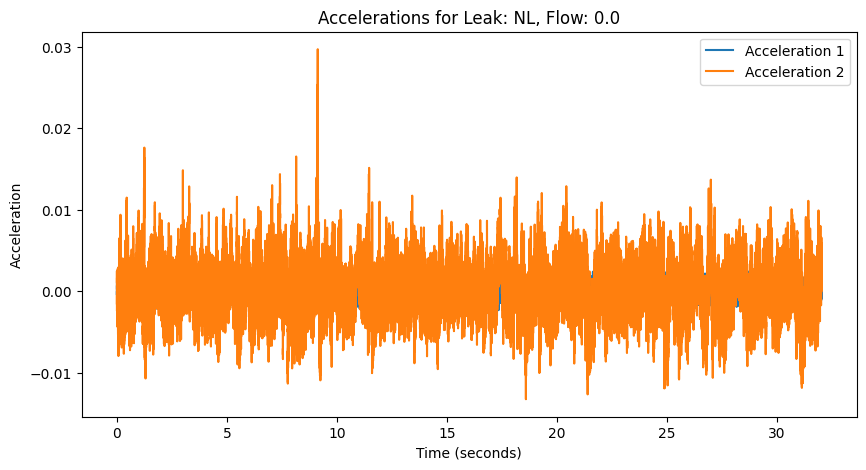

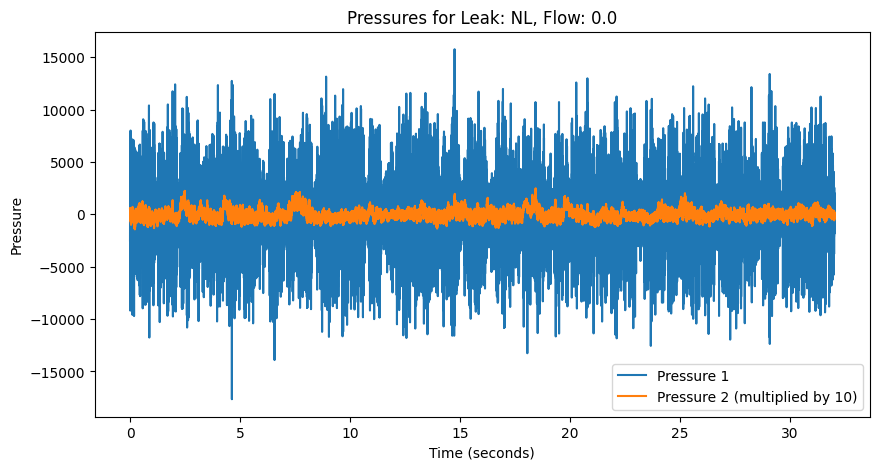

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


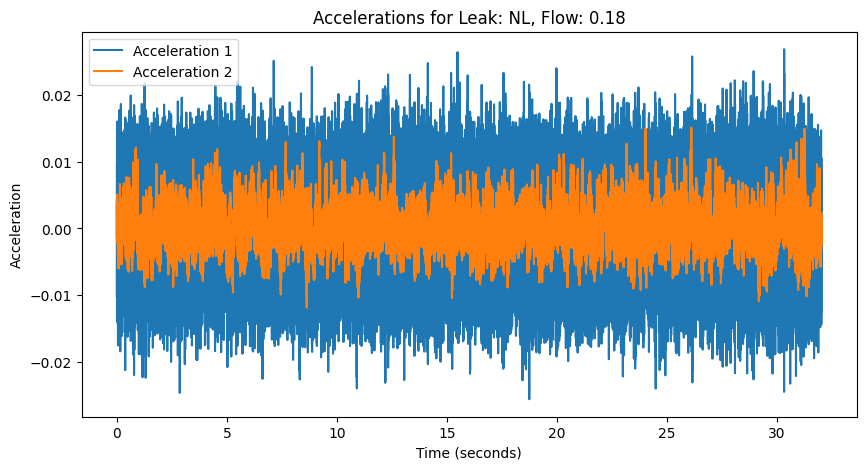

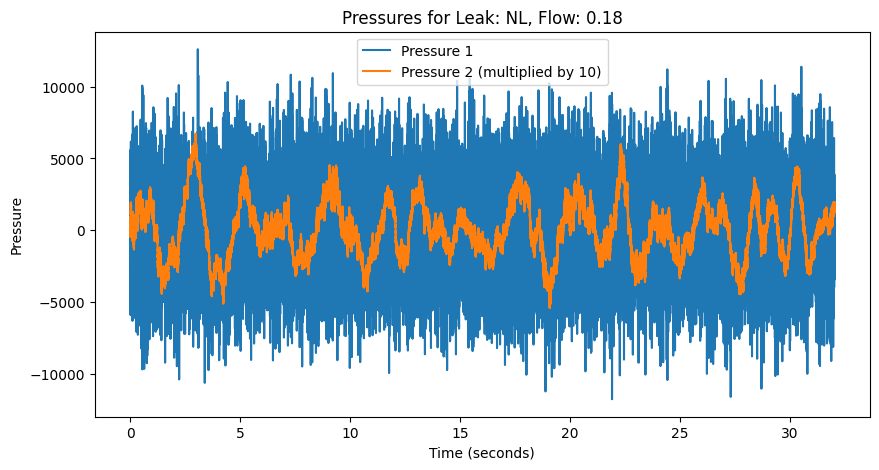

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


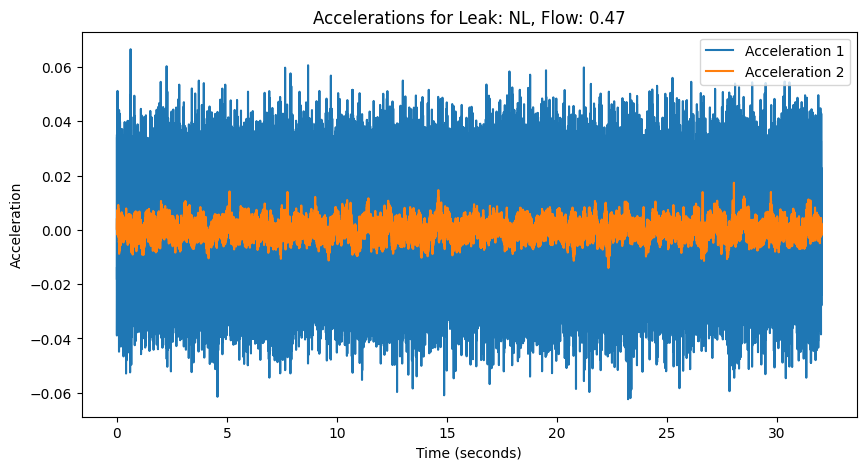

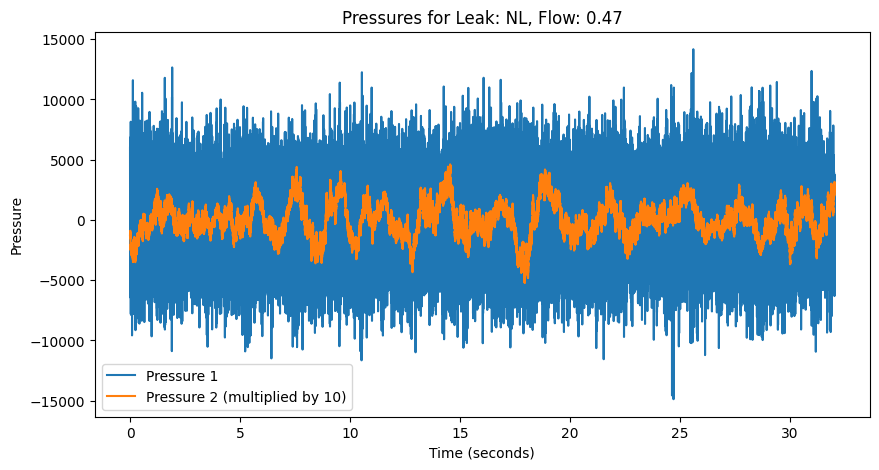

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


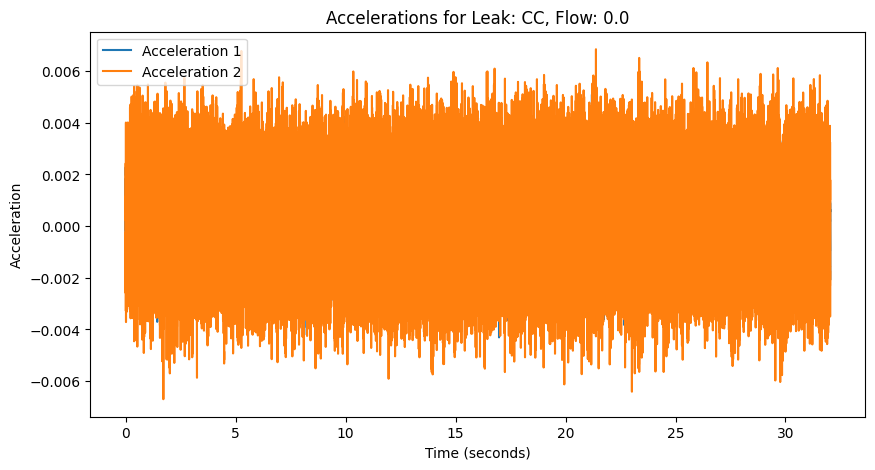

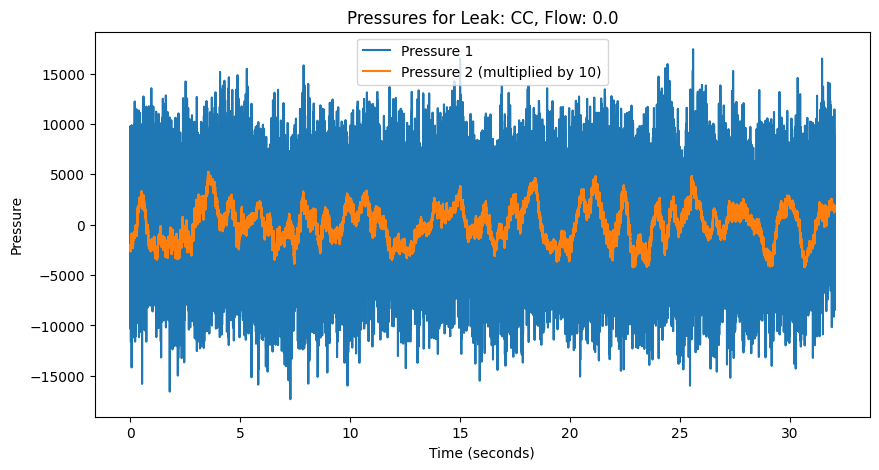

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


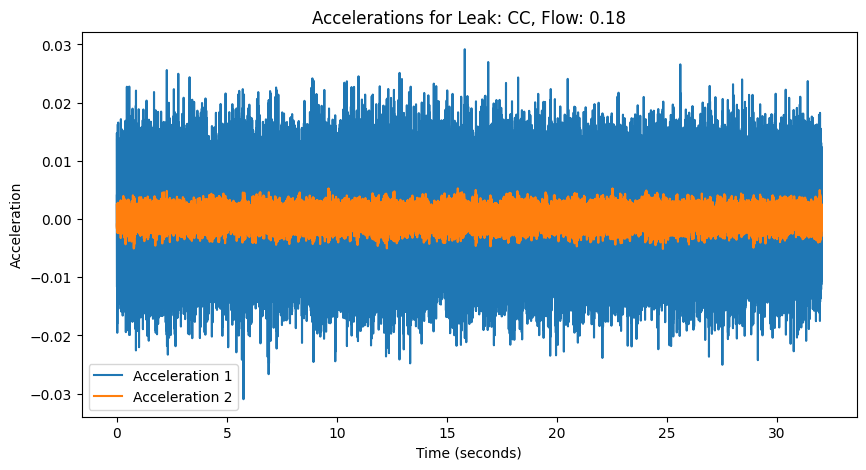

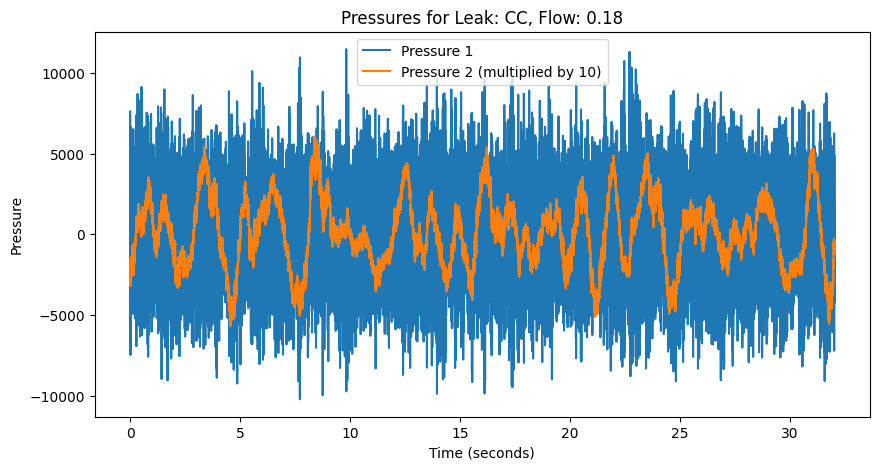

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


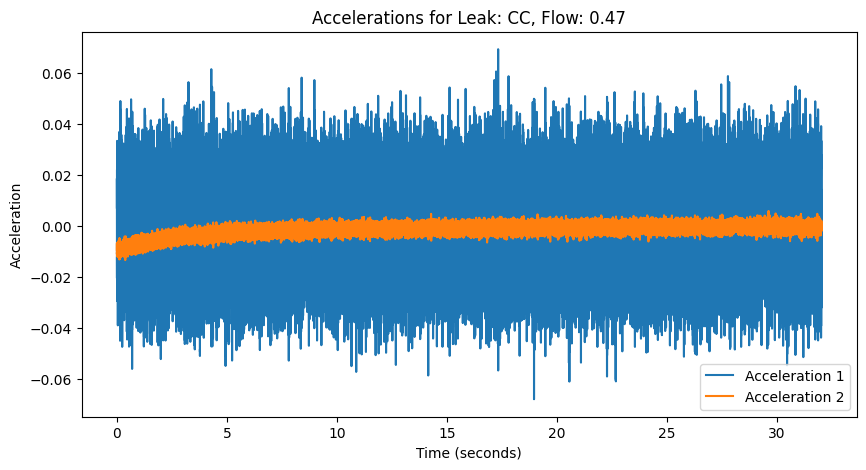

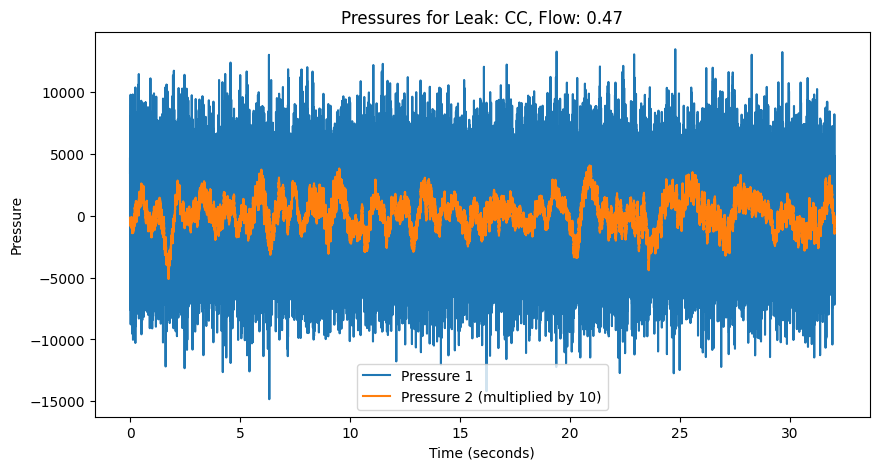

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


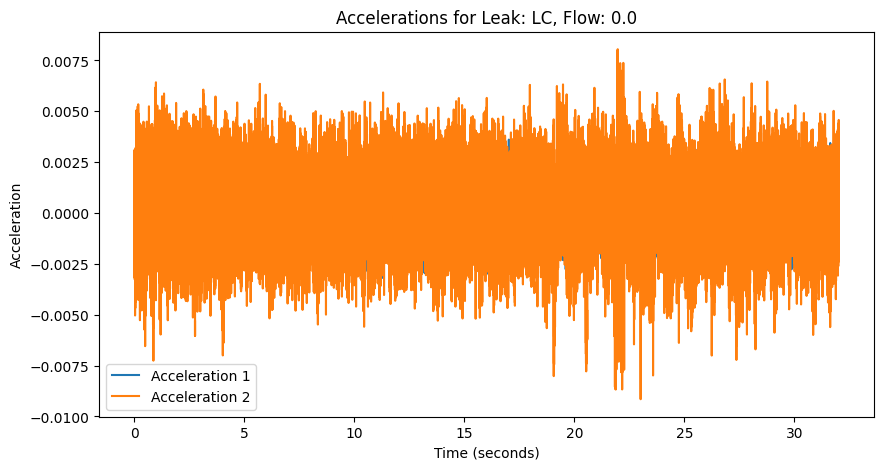

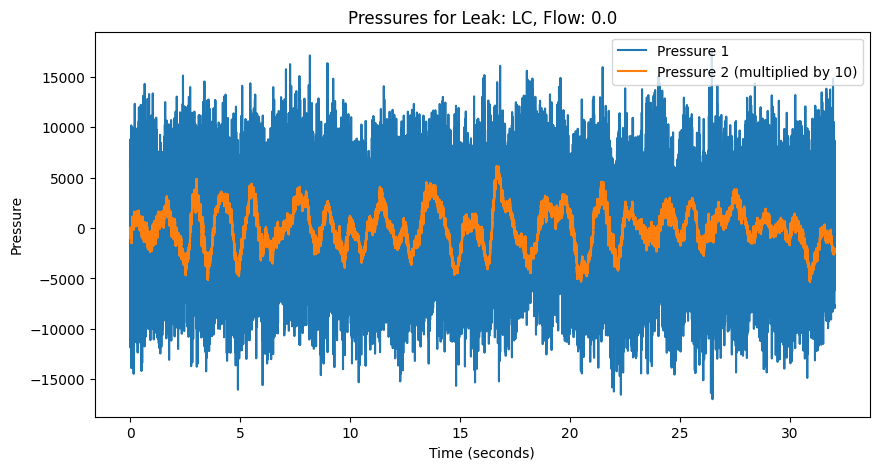

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


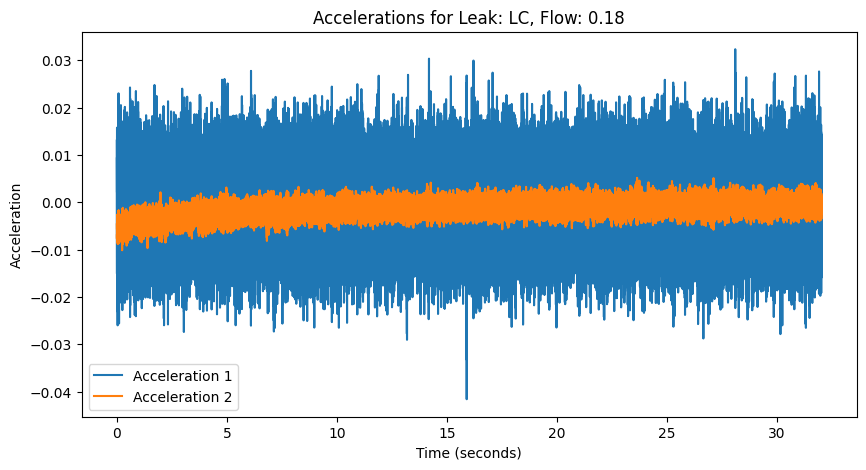

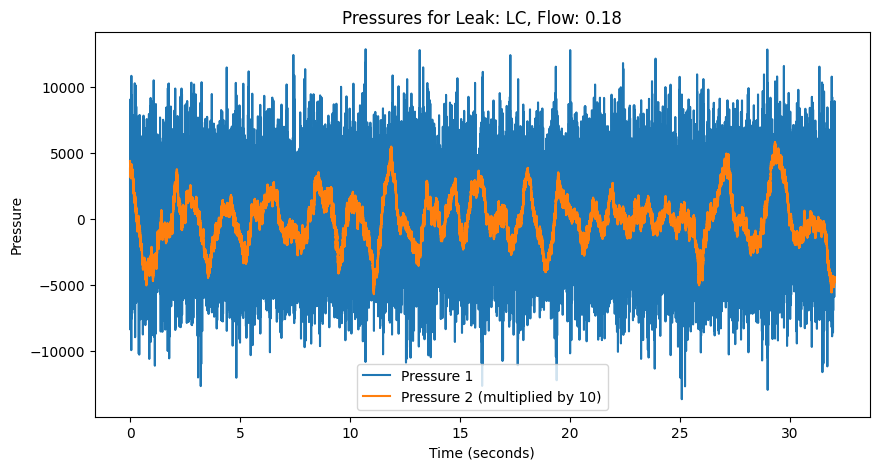

<ipython-input-11-87485344e5d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


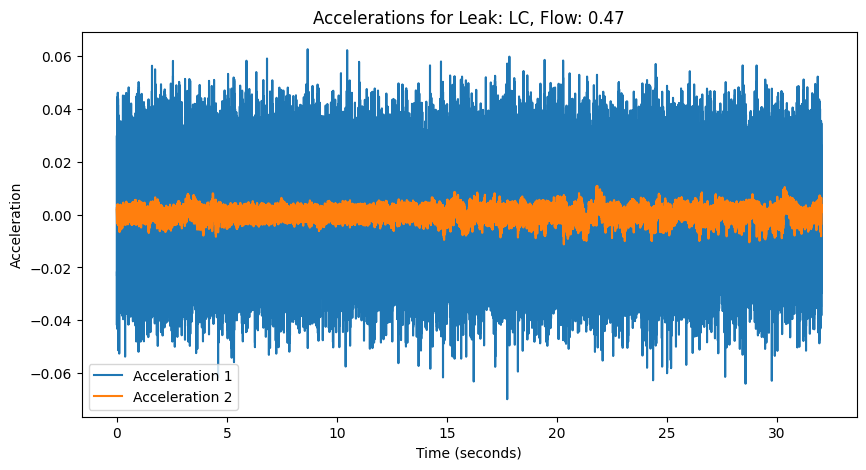

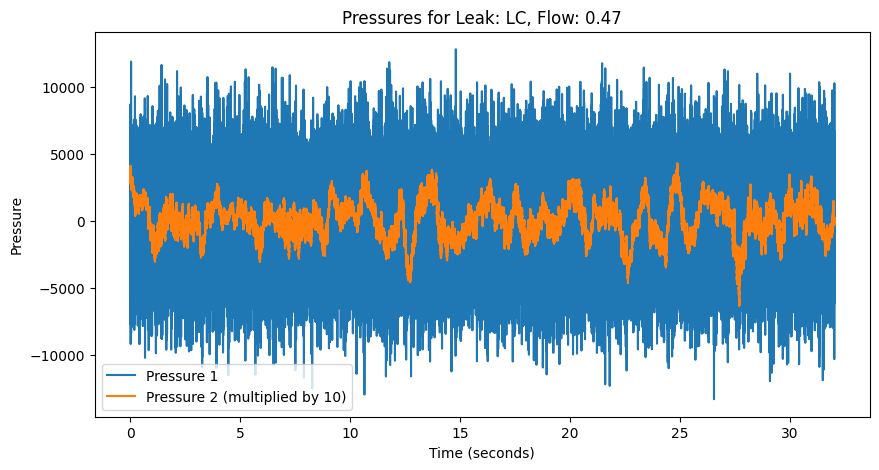

In [ ]:
# Posibles combinaciones de Leak y flow
leak_values = ['NL', 'CC', 'LC']
flow_values = [0.0, 0.18, 0.47]

#Diccionario que puede servir  a futuro
experiment_data = {}

# Iteracion por cada uno de los experimentos
for leak_value in leak_values:
    for flow_value in flow_values:

        experiment_df = df[(df['Leak'] == leak_value) & (df['Flow'] == flow_value)]
        # Presion 2 se multiplica por 10
        experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10

        key = f'Leak_{leak_value}_Flow_{flow_value}'
        experiment_data[key] = experiment_df

        # Acceelaciones
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Sample', y='ValueA1', data=experiment_df, label='Acceleration 1')
        sns.lineplot(x='Sample', y='ValueA2', data=experiment_df, label='Acceleration 2')
        plt.title(f'Accelerations for Leak: {leak_value}, Flow: {flow_value}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Acceleration')
        plt.legend()
        plt.show()

        # Presiones
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Sample', y='ValueP1', data=experiment_df, label='Pressure 1')
        sns.lineplot(x='Sample', y='ValueP2', data=experiment_df, label='Pressure 2 (multiplied by 10)')
        plt.title(f'Pressures for Leak: {leak_value}, Flow: {flow_value}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Pressure')
        plt.legend()
        plt.show()

Ahora se va a graficar 250 puntos posteriores a los 15 segundos (Equivalentes a 10 ms) de cada experimento para tener un poco de detalle en un punto "estable" de cada corrida

<ipython-input-17-4a6b6f63f506>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


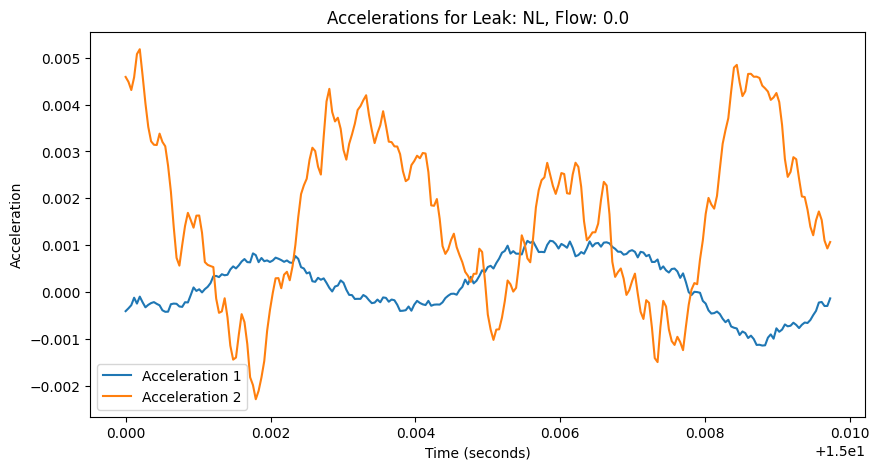

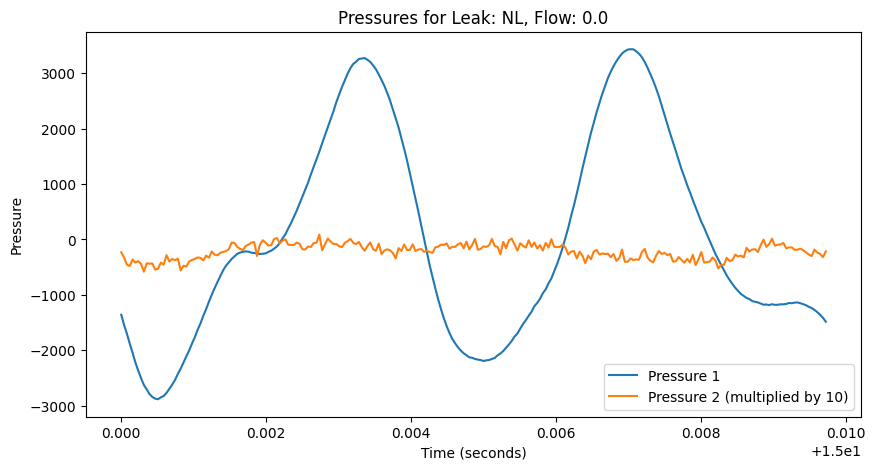

<ipython-input-17-4a6b6f63f506>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10


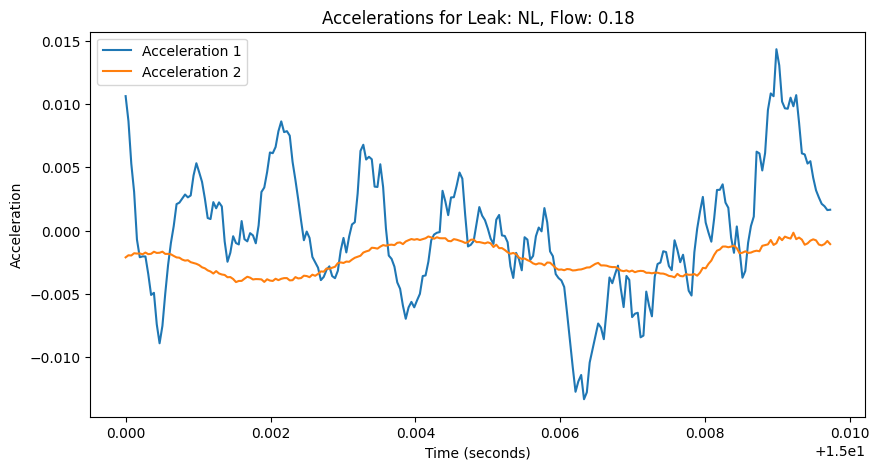

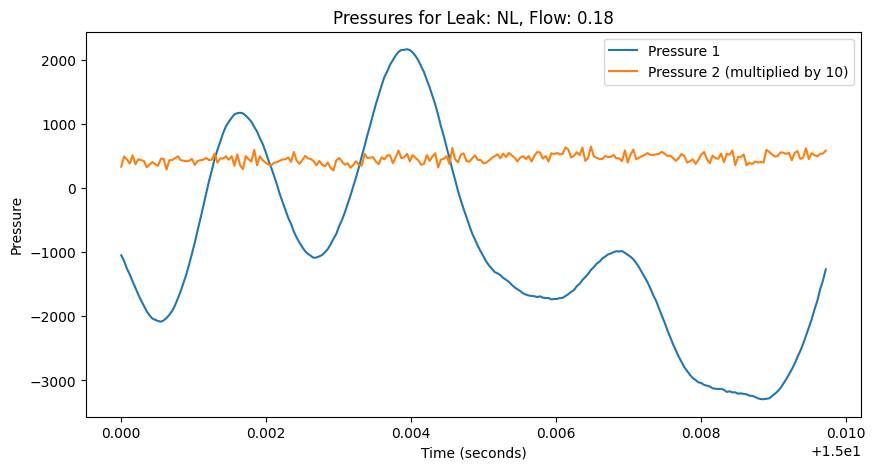

In [ ]:
for leak_value in leak_values:
    for flow_value in flow_values:
        experiment_df = df[(df['Leak'] == leak_value) & (df['Flow'] == flow_value)]
        experiment_df['ValueP2'] = experiment_df['ValueP2'] * 10

        # Se busca valor mas cercano a 15 segs
        target_time = 15.0
        closest_sample_index = np.argmin(np.abs(experiment_df['Sample'] - target_time))

        # Aceleraciones
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Sample', y='ValueA1', data=experiment_df.iloc[closest_sample_index:closest_sample_index + 250], label='Acceleration 1')
        sns.lineplot(x='Sample', y='ValueA2', data=experiment_df.iloc[closest_sample_index:closest_sample_index + 250], label='Acceleration 2')
        plt.title(f'Accelerations for Leak: {leak_value}, Flow: {flow_value}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Acceleration')
        plt.legend()
        plt.show()

        # Presiones
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Sample', y='ValueP1', data=experiment_df.iloc[closest_sample_index:closest_sample_index + 250], label='Pressure 1')
        sns.lineplot(x='Sample', y='ValueP2', data=experiment_df.iloc[closest_sample_index:closest_sample_index + 250], label='Pressure 2 (multiplied by 10)')
        plt.title(f'Pressures for Leak: {leak_value}, Flow: {flow_value}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Pressure')
        plt.legend()
        plt.show()

In [4]:
import pandas as pd
import numpy as np

# Ruta al archivo CSV
ruta = "/content/drive/MyDrive/Colab Notebooks/Inteligencia_artificial/DataFinal.csv"

# Leer el archivo CSV con comas como separadores y comillas simples en los nombres de las columnas
df = pd.read_csv(ruta, sep=',', quotechar="'")

# Mostrar las primeras 10 filas del DataFrame
df.head(10)

,Sample,ValueA1,ValueA2,ValueP1,ValueP2,Leak,Flow
0,0.000000,0.001997,-0.000543,-217.853912,-212.802075,CC,0.0
1,0.000039,0.002015,-0.001183,-472.613815,-206.656122,CC,0.0
2,0.000078,0.001981,-0.001659,-696.642334,-205.281369,CC,0.0
3,0.000117,0.002254,-0.001834,-899.910822,-210.537776,CC,0.0
4,0.000156,0.001869,-0.001906,-1085.852041,-206.817857,CC,0.0
5,0.000195,0.001910,-0.001976,-1263.374822,-214.419431,CC,0.0
6,0.000234,0.002215,-0.001804,-1403.872824,-219.433235,CC,0.0
7,0.000273,0.002151,-0.001289,-1514.048104,-214.338563,CC,0.0
8,0.000313,0.002045,-0.000937,-1610.737538,-208.435213,CC,0.0
9,0.000352,0.001972,-0.001103,-1679.065828,-212.155132,CC,0.0


In [28]:
#Para identificar correlación
correlation_matrix = df.corr()

<ipython-input-28-2372125e7349>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


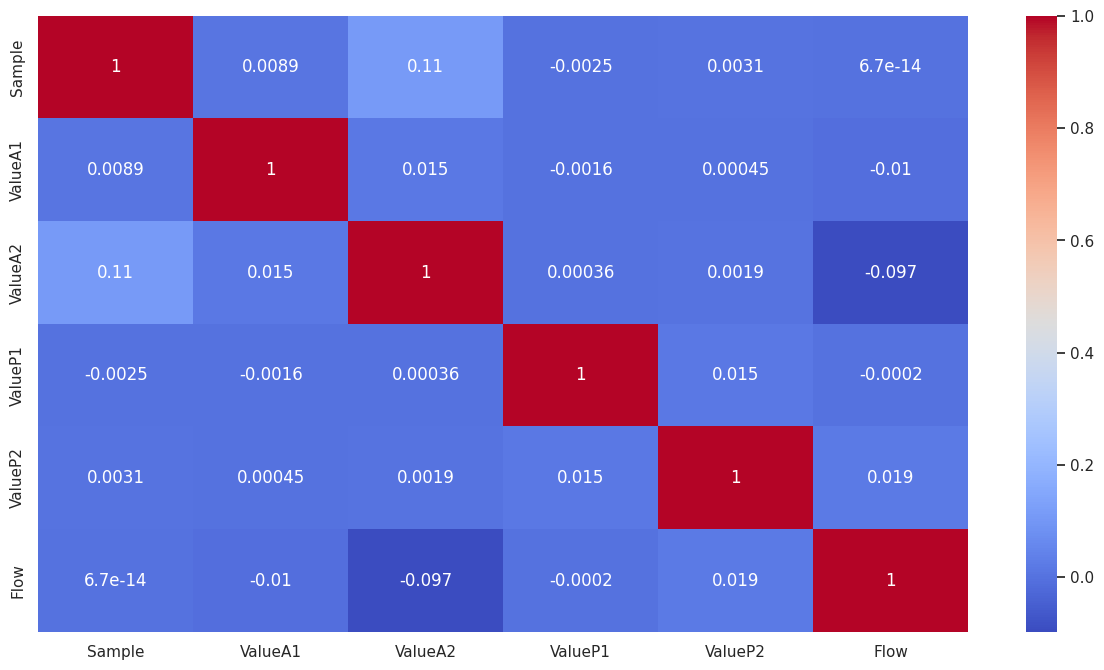

In [29]:
# Mapa de Correlacion
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

No se evidencia una correlación solida entre las variables.

La correlación se mide en una escala de -1 a 1, donde:

1 indica una correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta en proporción constante.
-1 indica una correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye en proporción constante.
0 indica que no hay correlación lineal.


En el diagrama resalta una debil correlacion entre el flujo y el valor de A2. Obteniendo un valor de -0.097

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

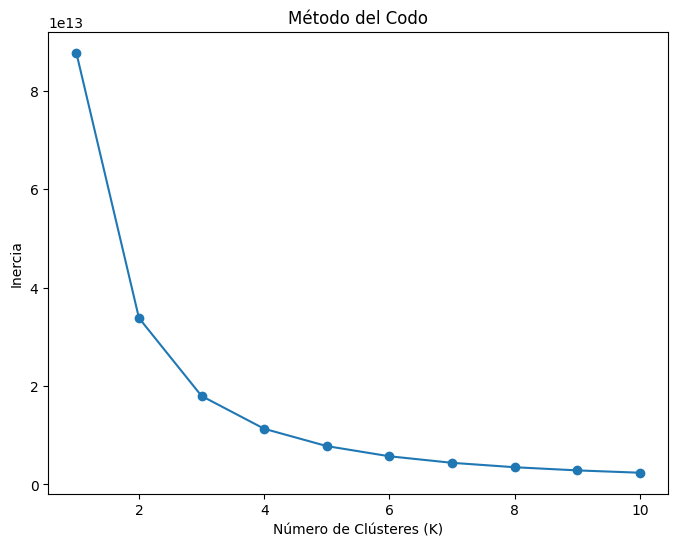

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con las columnas especificadas

# Selecciona las columnas relevantes para el clustering
data_for_clustering = df[['ValueA1', 'ValueA2', 'ValueP1', 'ValueP2', 'Flow']]

# Lista para almacenar las inercias
inertias = []

# Probamos diferentes valores de K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertias.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.show()

Para determinar el número óptimo de grupos, tenemos que seleccionar el valor de k en el "codo", es decir, el punto después del cual la distorsión/inercia comienza a disminuir de forma lineal. Por lo tanto, para los datos dados, concluimos que el número óptimo de conglomerados para los datos es 3 . Que es el valor donde se evidencia una disminucion significativa , formando un codo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


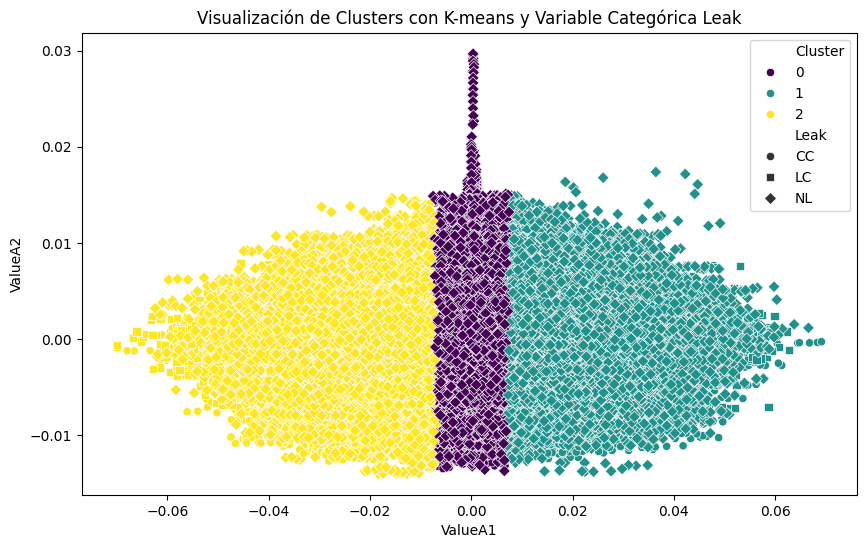

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df contiene tus datos después de la transformación y el escalamiento
# Selecciona las características relevantes
features = df[['ValueA1', 'ValueA2']]

# Entrenar el modelo K-means con el número óptimo de clusters (supongamos k=3)
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(features)

# Asignar etiquetas de cluster a los datos
df['Cluster'] = kmeans_model.labels_

# Gráfico de dispersión con colores por cluster y marcadores distintos por cada categoría de 'Leak'
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='ValueA1', y='ValueA2', hue='Cluster', style='Leak', data=df, palette='viridis', markers={'CC': 'o', 'LC': 's', 'NL': 'D'})
scatter.set_title('Visualización de Clusters con K-means y Variable Categórica Leak')
plt.show()


In [16]:
# Guardar la figura como una imagen (por ejemplo, PNG)
plt.savefig('resultado_kmeans.png', bbox_inches='tight')

# Mostrar la figura
plt.show()

<Figure size 640x480 with 0 Axes>

El modelo de K means, se entrena utilizando las caracteristicas Value A1 Y Value A2. n_clusters=3, random_state=42.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


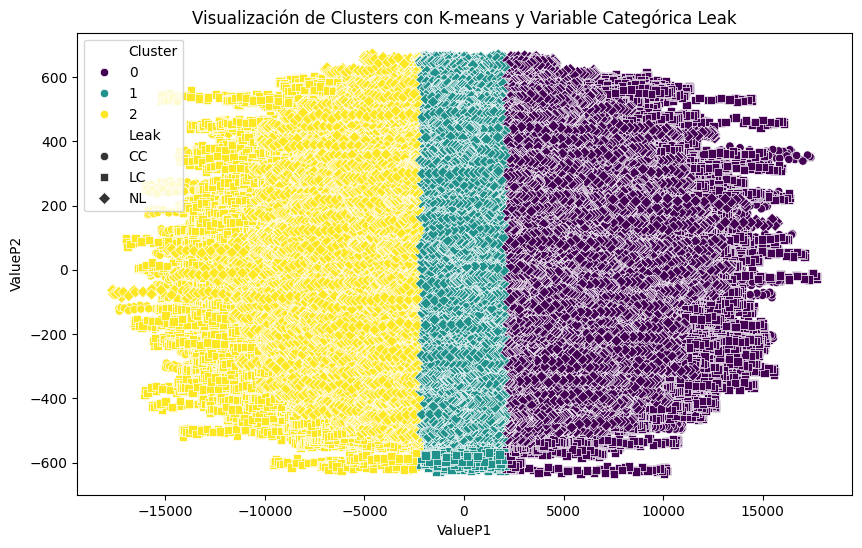

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df contiene tus datos después de la transformación y el escalamiento
# Selecciona las características relevantes
features = df[['ValueP1', 'ValueP2']]

# Entrenar el modelo K-means con el número óptimo de clusters (supongamos k=3)
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(features)

# Asignar etiquetas de cluster a los datos
df['Cluster'] = kmeans_model.labels_

# Gráfico de dispersión con colores por cluster y marcadores distintos por cada categoría de 'Leak'
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='ValueP1', y='ValueP2', hue='Cluster', style='Leak', data=df, palette='viridis', markers={'CC': 'o', 'LC': 's', 'NL': 'D'})
scatter.set_title('Visualización de Clusters con K-means y Variable Categórica Leak')
plt.show()

**Discretizacion o Binning**


La discretización o binning es el proceso de dividir variables numéricas en categorías o "bins". Esto puede ser útil para simplificar la complejidad de los datos, reducir el ruido y facilitar la interpretación. .



In [19]:
pip install seaborn

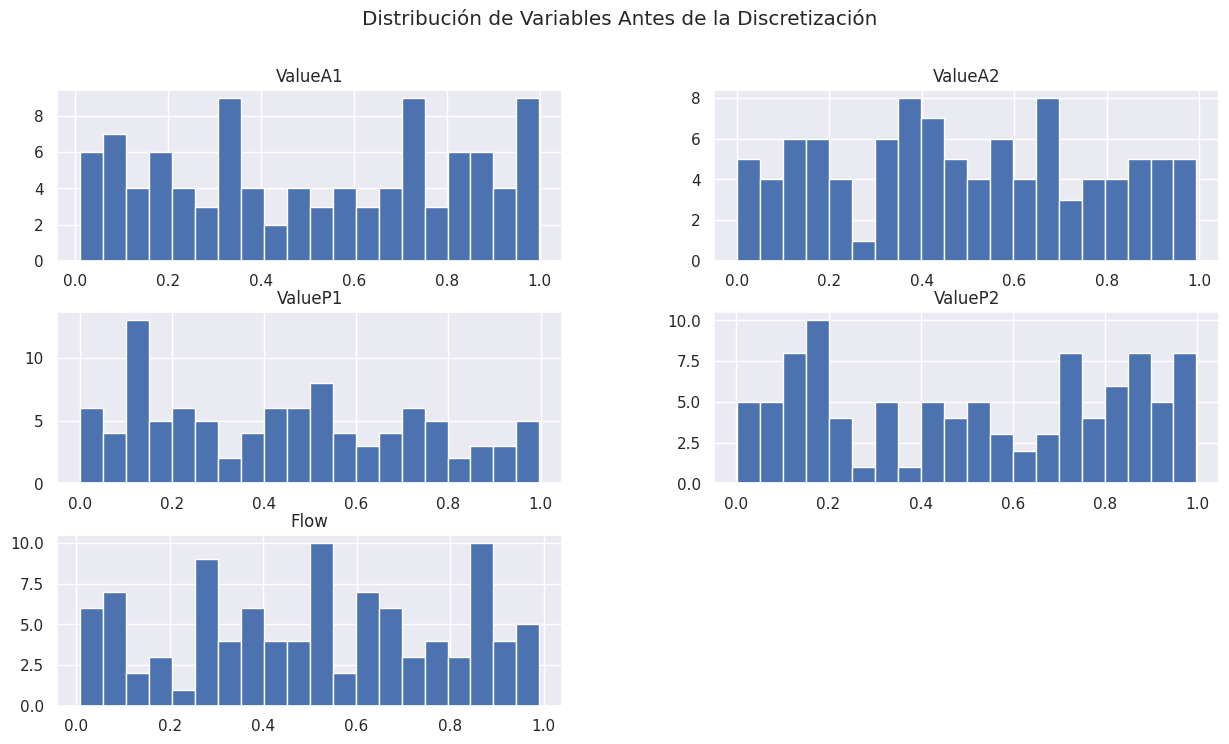

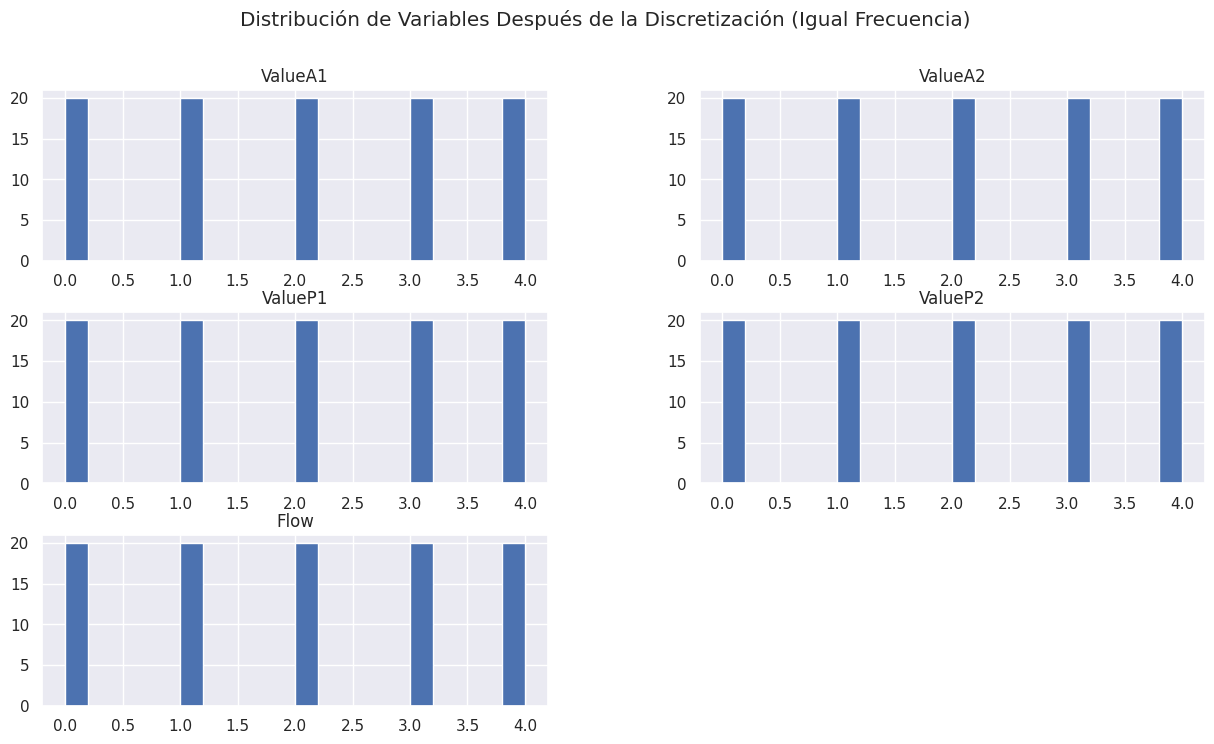

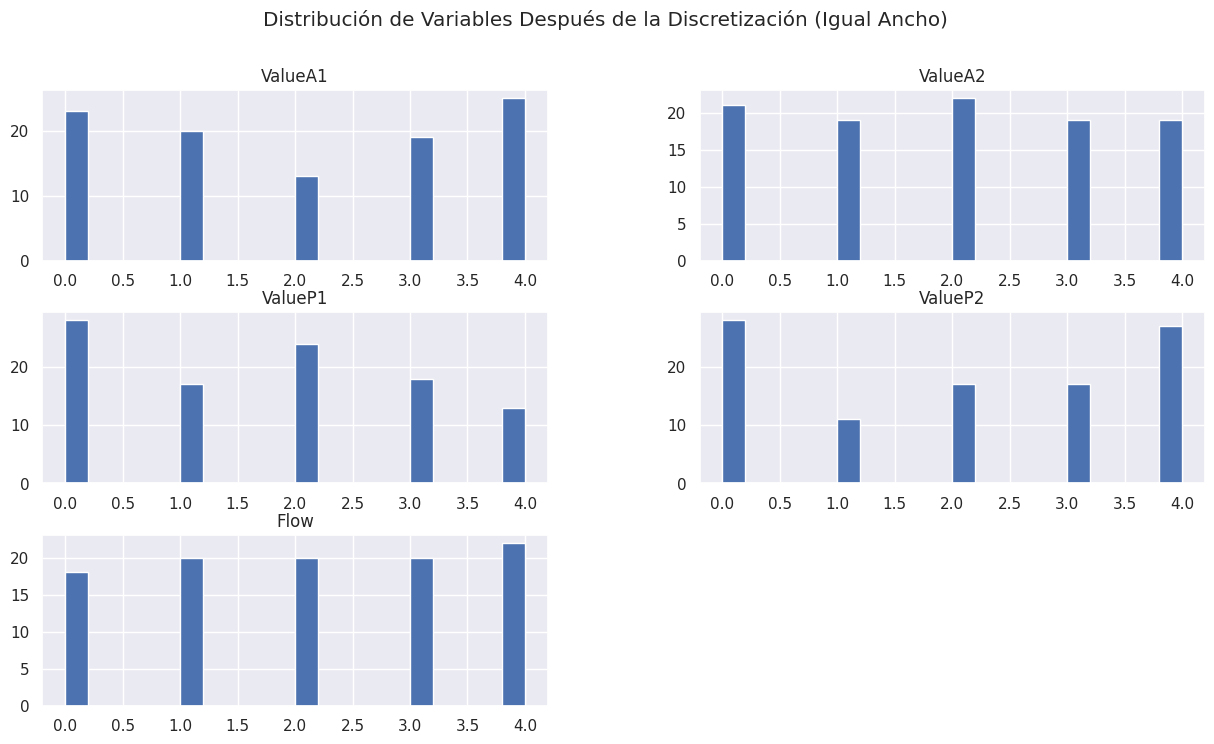

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Vamos a utilizar solo las variables numéricas para la discretización
variables_numericas = ['ValueA1', 'ValueA2', 'ValueP1', 'ValueP2', 'Flow']

# Crear un DataFrame de ejemplo
data = {'ValueA1': np.random.rand(100),
        'ValueA2': np.random.rand(100),
        'ValueP1': np.random.rand(100),
        'ValueP2': np.random.rand(100),
        'Flow': np.random.rand(100)}

df = pd.DataFrame(data)

# Visualización de las variables antes de la discretización
sns.set(rc={'figure.figsize':(15,8)})
df[variables_numericas].hist(bins=20)
plt.suptitle('Distribución de Variables Antes de la Discretización')
plt.show()

# Discretización utilizando igual frecuencia (qcut)
df_discretizado_qcut = pd.DataFrame()
for variable in variables_numericas:
    df_discretizado_qcut[variable] = pd.qcut(df[variable], q=5, labels=False)

# Visualización de las variables después de la discretización (igual frecuencia)
sns.set(rc={'figure.figsize':(15,8)})
df_discretizado_qcut.hist(bins=20)
plt.suptitle('Distribución de Variables Después de la Discretización (Igual Frecuencia)')
plt.show()

# Discretización utilizando igual ancho (cut)
df_discretizado_cut = pd.DataFrame()
for variable in variables_numericas:
    df_discretizado_cut[variable] = pd.cut(df[variable], bins=5, labels=False)

# Visualización de las variables después de la discretización (igual ancho)
sns.set(rc={'figure.figsize':(15,8)})
df_discretizado_cut.hist(bins=20)
plt.suptitle('Distribución de Variables Después de la Discretización (Igual Ancho)')
plt.show()


*codificación one-hot*

In [21]:
import pandas as pd

# Tu DataFrame con la variable categórica 'Leak'
data = {'Sample': [1, 2, 3, 4, 5],
        'ValueA1': [10.5, 12.0, 11.2, 9.8, 10.0],
        'ValueA2': [20.1, 18.5, 19.0, 21.2, 20.8],
        'ValueP1': [15.3, 14.8, 16.0, 15.5, 14.2],
        'ValueP2': [25.0, 23.5, 24.2, 25.8, 24.0],
        'Leak': ['CC', 'LC', 'LC', 'CC', 'NL'],
        'Flow': [30.2, 29.5, 31.0, 30.8, 29.0]}

df = pd.DataFrame(data)

# Codificación one-hot para la columna 'Leak'
df_encoded = pd.get_dummies(df, columns=['Leak'], prefix='Leak')

# Muestra el DataFrame resultante
print(df_encoded)


   Sample  ValueA1  ValueA2  ValueP1  ValueP2  Flow  Leak_CC  Leak_LC  Leak_NL
0       1     10.5     20.1     15.3     25.0  30.2        1        0        0
1       2     12.0     18.5     14.8     23.5  29.5        0        1        0
2       3     11.2     19.0     16.0     24.2  31.0        0        1        0
3       4      9.8     21.2     15.5     25.8  30.8        1        0        0
4       5     10.0     20.8     14.2     24.0  29.0        0        0        1


*Normalización (MinMax Scaling)*

La normalización escala los datos a un rango específico, comúnmente entre 0 y 1. Esto es útil cuando tienes variables con diferentes rangos y quieres que todas estén en una escala similar.

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Tu DataFrame
# (Asumiendo que ya aplicaste la codificación one-hot a 'Leak' y tienes solo variables numéricas)
data = {'Sample': [1, 2, 3, 4, 5],
        'ValueA1': [10.5, 12.0, 11.2, 9.8, 10.0],
        'ValueA2': [20.1, 18.5, 19.0, 21.2, 20.8],
        'ValueP1': [15.3, 14.8, 16.0, 15.5, 14.2],
        'ValueP2': [25.0, 23.5, 24.2, 25.8, 24.0],
        'Leak_CC': [1, 0, 0, 1, 0],
        'Leak_LC': [0, 1, 1, 0, 0],
        'Leak_NL': [0, 0, 0, 0, 1],
        'Flow': [30.2, 29.5, 31.0, 30.8, 29.0]}

df = pd.DataFrame(data)

# Selecciona solo las variables numéricas para la normalización
variables_numericas = df.select_dtypes(include='number').columns

# Normalización (MinMax Scaling)
scaler = MinMaxScaler()
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Muestra el DataFrame resultante después de la normalización
print(df)


   Sample   ValueA1   ValueA2   ValueP1   ValueP2  Leak_CC  Leak_LC  Leak_NL  \
0    0.00  0.318182  0.592593  0.611111  0.652174      1.0      0.0      0.0   
1    0.25  1.000000  0.000000  0.333333  0.000000      0.0      1.0      0.0   
2    0.50  0.636364  0.185185  1.000000  0.304348      0.0      1.0      0.0   
3    0.75  0.000000  1.000000  0.722222  1.000000      1.0      0.0      0.0   
4    1.00  0.090909  0.851852  0.000000  0.217391      0.0      0.0      1.0   

   Flow  
0  0.60  
1  0.25  
2  1.00  
3  0.90  
4  0.00  


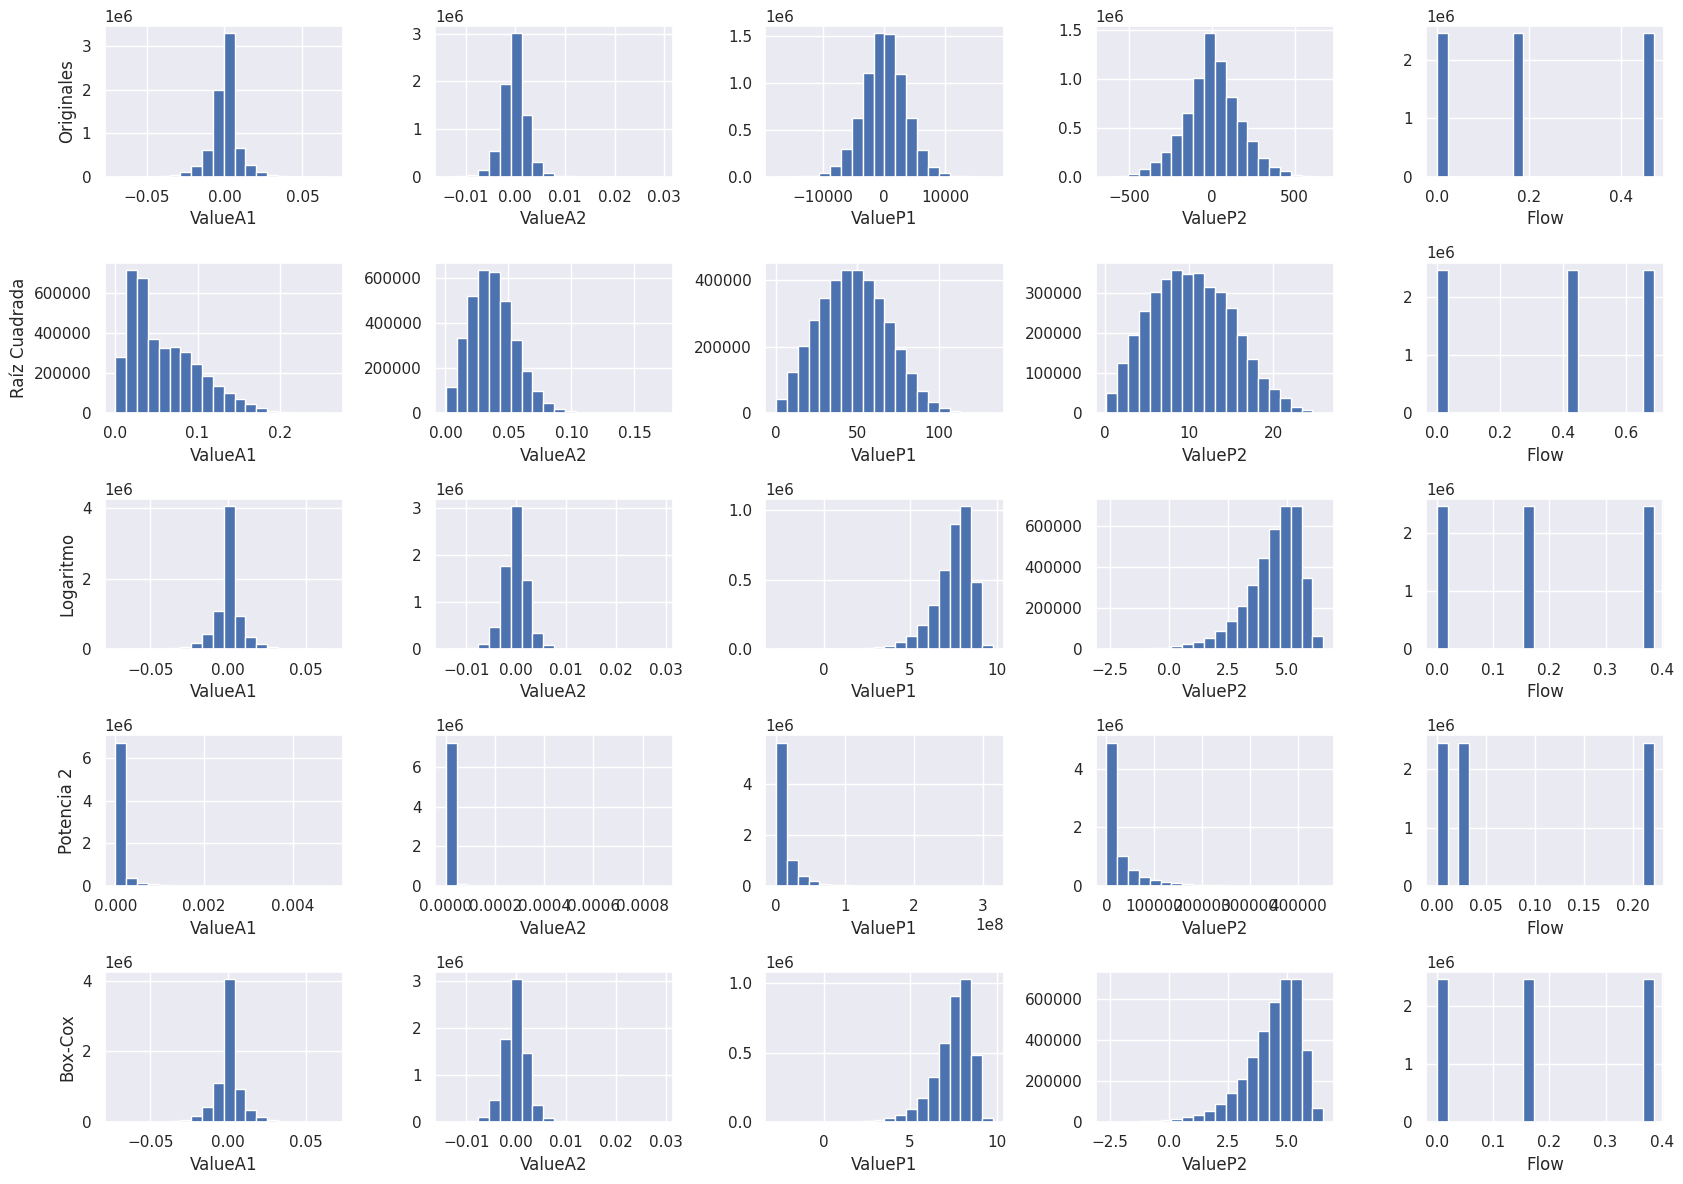

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import power_transform
from scipy.special import boxcox1p
import seaborn as sns

# Lista de los nombres de las 5 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['ValueA1', 'ValueA2', 'ValueP1', 'ValueP2', 'Flow']

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 5)  # Cambié el número de subgráficos a 5

for k in range(5):

    # Datos originales
    plt.subplot(5, 5, k+1)
    Transf0 = df[variables_a_transformar[k]]
    plt.hist(Transf0, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Originales')

    # Datos transformados con raíz cuadrada
    plt.subplot(5, 5, k+6)  # Cambié el índice de inicio para los subgráficos transformados
    Transf1 = np.sqrt(df[variables_a_transformar[k]])
    plt.hist(Transf1, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Raíz Cuadrada')

    # Datos transformados con logaritmo natural
    plt.subplot(5, 5, k+11)
    Transf2 = np.log1p(df[variables_a_transformar[k]])
    plt.hist(Transf2, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Logaritmo')

    # Datos transformados con la potencia de 2
    plt.subplot(5, 5, k+16)
    Transf3 = np.power(df[variables_a_transformar[k]], 2)
    plt.hist(Transf3, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Potencia 2')

    # Datos transformados con Box-Cox
    plt.subplot(5, 5, k+21)
    Transf4 = boxcox1p(df[variables_a_transformar[k]], 0)
    plt.hist(Transf4, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Box-Cox')

plt.tight_layout()  # Añadí este comando para mejorar la disposición de las subgráficas
plt.show()


*Análisis de componentes principales (PCA)*

Varianza explicada por cada componente principal: [0.22034846 0.20306621 0.19956955 0.19694032 0.18007546]


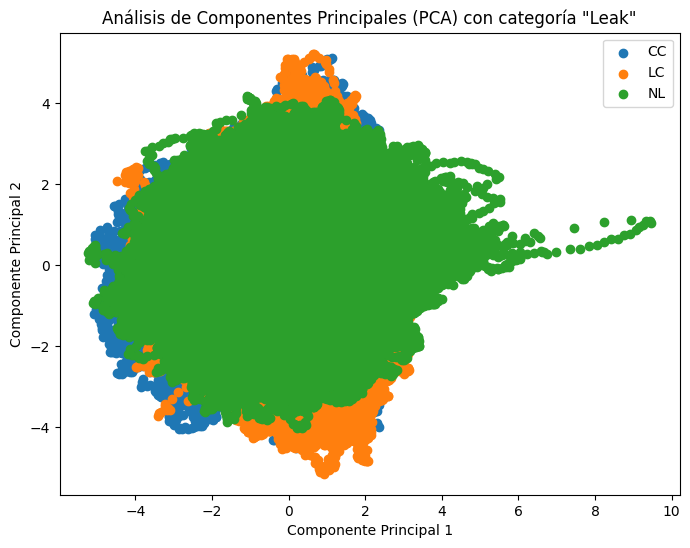

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos en un DataFrame llamado 'df'
# Asegúrate de incluir las columnas 'ValueA1', 'ValueA2', 'ValueP1', 'ValueP2', 'Flow' y 'Leak' en tu DataFrame

# Seleccionar solo las columnas relevantes para el análisis PCA
features = ['ValueA1', 'ValueA2', 'ValueP1', 'ValueP2', 'Flow']
X = df[features]

# Estandarizar los datos para que tengan media 0 y varianza 1 (importante para PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Crear un DataFrame con los componentes principales y añadir una columna con el valor de 'Leak'
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['Leak'] = df['Leak']

# Visualizar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance_ratio)

# Visualizar un gráfico de dispersión 2D de los dos primeros componentes principales, coloreando por categoría 'Leak'
plt.figure(figsize=(8, 6))
for category in df['Leak'].unique():
    plt.scatter(df_pca.loc[df['Leak'] == category, 'PC1'], df_pca.loc[df['Leak'] == category, 'PC2'], label=category)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análisis de Componentes Principales (PCA) con categoría "Leak"')
plt.legend()
plt.show()

